In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


#### Adding all the csv data in one dataframe

In [110]:
path = 'sales_data/'
csv_file_list = [path+file for file in os.listdir(
    path) if not file.startswith('.')]

In [111]:
sale_data = pd.concat(map(pd.read_csv, csv_file_list))

## Data Cleaning

#### Removing whitespace from column names and converting it in lowercase

In [112]:
sale_data.columns = sale_data.columns.str.replace(' ','_').str.lower()

#### Checking if there are any NaN values and removing it

In [113]:
sale_data.isnull().values.sum()

3270

In [114]:
sale_data.dropna(how='all', inplace=True)

In [115]:
sale_data = sale_data[sale_data.order_date.str[:2]!='Or']
sale_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          185950 non-null  object
 1   product           185950 non-null  object
 2   quantity_ordered  185950 non-null  object
 3   price_each        185950 non-null  object
 4   order_date        185950 non-null  object
 5   purchase_address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### Adding Month column

In [116]:
sale_data.order_date = pd.to_datetime(sale_data.order_date)


In [117]:
sale_data['month'] = pd.DatetimeIndex(sale_data.order_date).month

#### Changing Datatype of columns for calculations

In [118]:
sale_data.quantity_ordered = pd.to_numeric(sale_data.quantity_ordered)
sale_data.price_each = pd.to_numeric(sale_data.price_each)

#### Adding sales column

In [119]:
sale_data['sales'] = sale_data.quantity_ordered * sale_data.price_each

In [120]:
sale_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Questation
#### 1 - What was the best month for sales? How much was earned that month? 

In [121]:
sale_data.groupby('month').sum()


,quantity_ordered,price_each,sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


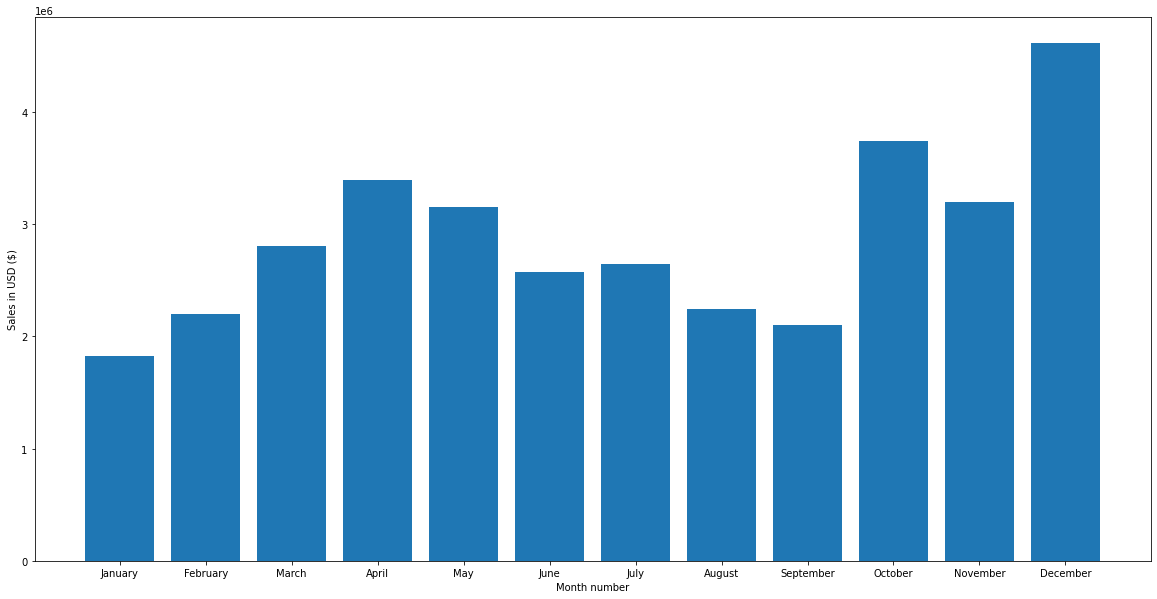

In [122]:
plt.figure(figsize=(20,10))

months = [month for month, df in sale_data.groupby('month')]
months = [calendar.month_name[month] for month in months]
plt.bar(months,sale_data.groupby(['month']).sum()['sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


### Q2 - What city sold the most product?

In [123]:
sale_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Extracting the city from the address
###### taking state as well to avoid confusion with same city name

In [124]:
sale_data['city'] = sale_data.loc[:,'purchase_address'].apply(lambda x:x.split(',')[1]+' '+ x.split(' ')[-2])

In [125]:
sale_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


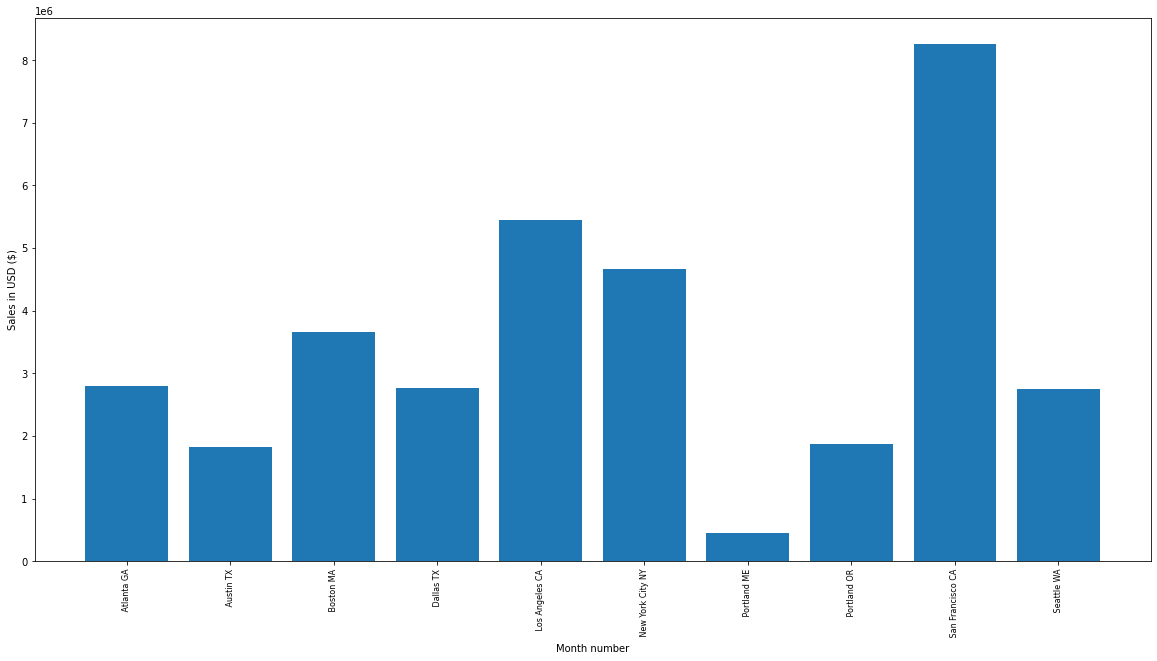

In [126]:
keys = [city for city, df in sale_data.groupby(['city'])]
plt.figure(figsize=(20, 10))

plt.bar(keys, sale_data.groupby(['city']).sum()['sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


### Q3 - On What time product sale in increasing?

In [127]:
sale_data['hour'] = pd.to_datetime(sale_data['order_date']).dt.hour
sale_data['minute'] = pd.to_datetime(sale_data['order_date']).dt.minute
sale_data['count'] = 1
sale_data.head()


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,minute,count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,1


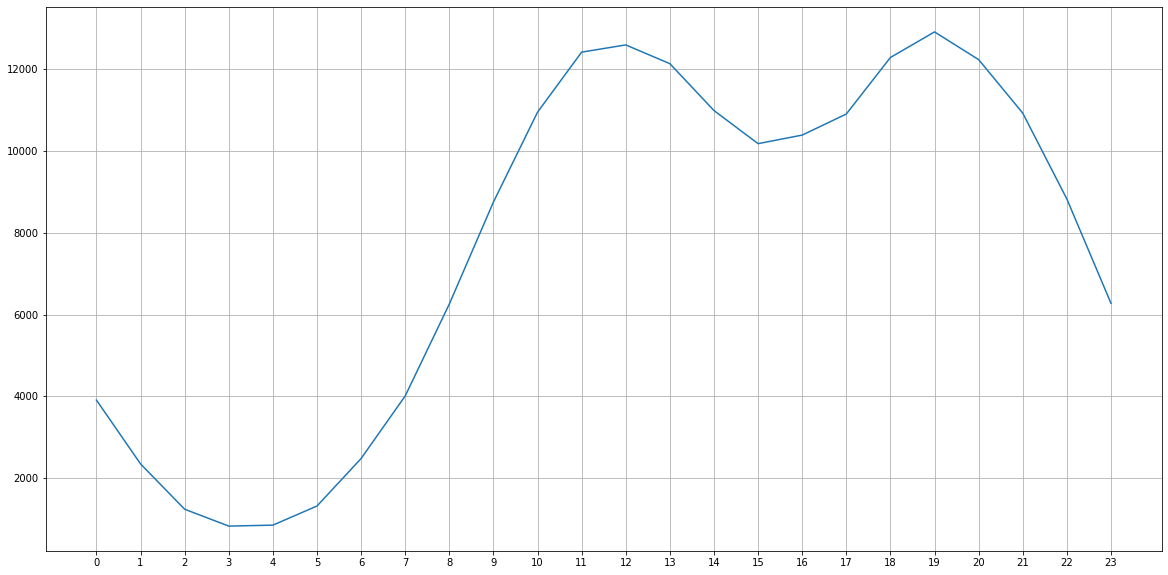

In [128]:
plt.figure(figsize=[20,10])
keys = [pair for pair, df in sale_data.groupby(['hour'])]

plt.plot(keys, sale_data.groupby(['hour']).count()['count'])
plt.xticks(keys)
plt.grid()
plt.show()


### Q-4 What product are most often sold together

In [129]:
df = sale_data[sale_data['order_id'].duplicated(keep=False)]

df['grouped'] = df.groupby('order_id')[
    'product'].transform(lambda x: ','.join(x))
df2 = df[['order_id', 'grouped']].drop_duplicates()


/tmp/ipykernel_8150/4264847615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('order_id')[


In [130]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

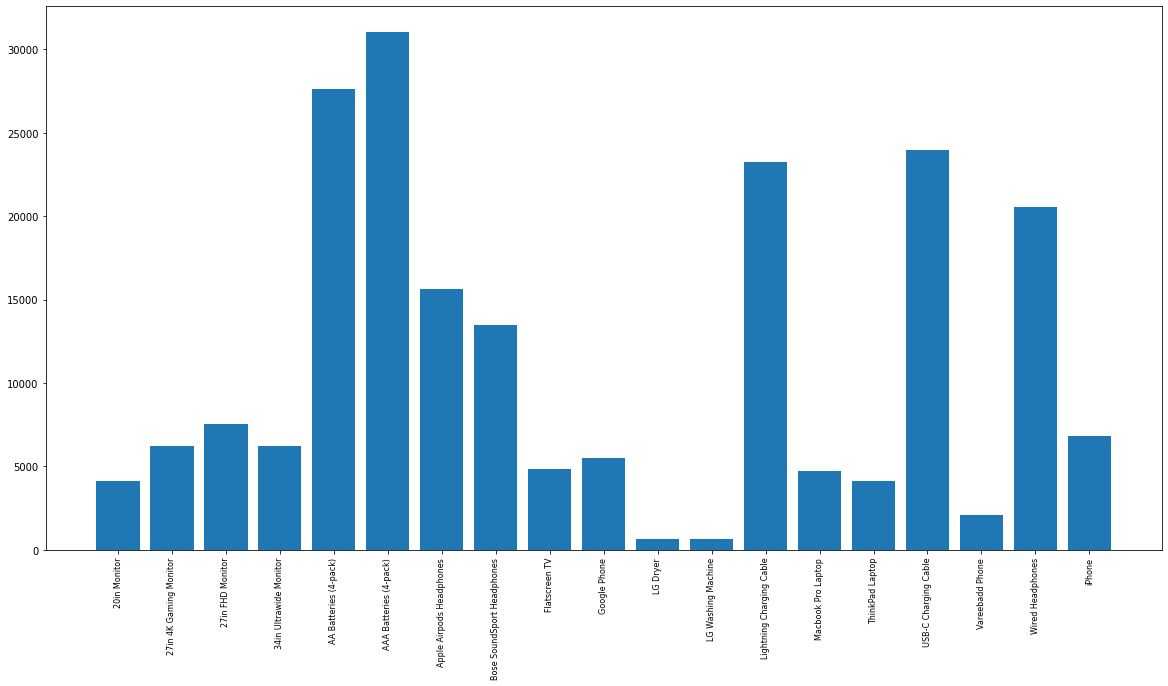

In [131]:
product_group = sale_data.groupby('product')
quantity_ordered = product_group.sum()['quantity_ordered']
plt.figure(figsize=[20,10])
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


Figure(432x288)


/tmp/ipykernel_8150/3470741509.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


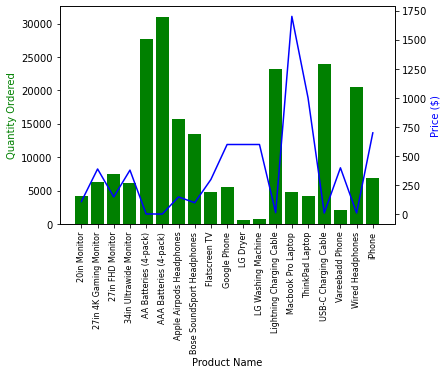

In [132]:

prices = sale_data.groupby('product').mean()['price_each']

fig, ax1 = plt.subplots()
print(fig)
ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()
